# **SENTIMENT ANALYSIS ON MOVIE REVIEWS**

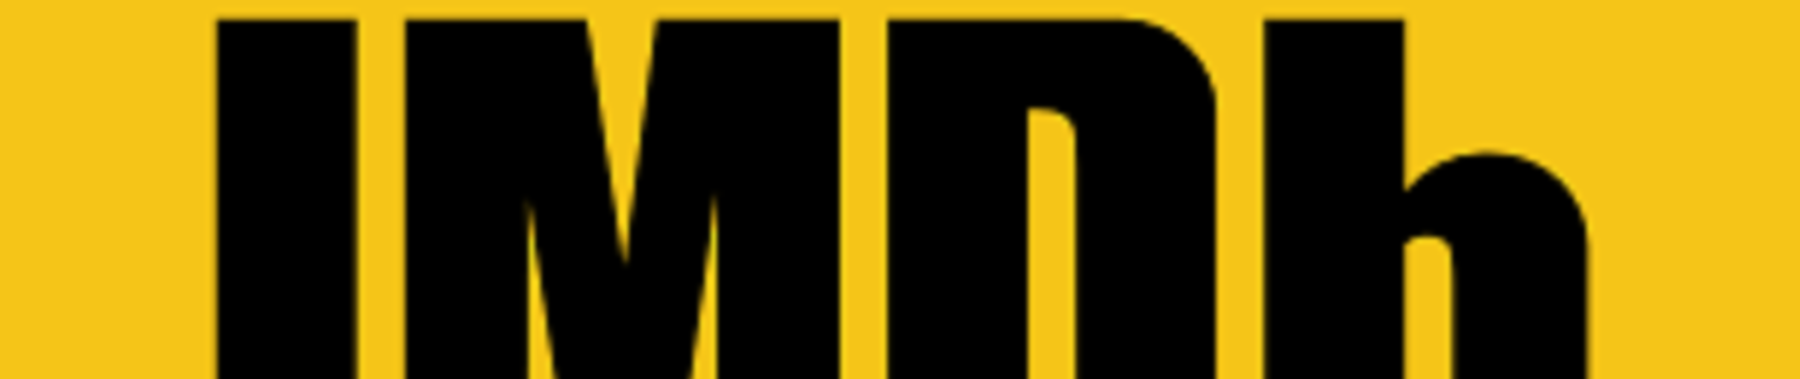

1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning

# **LOAD AND AUDIT THE DATA**

In [1]:
!unzip '/content/IMDB Dataset.csv.zip'

Archive:  /content/IMDB Dataset.csv.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: IMDB Dataset.csv        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: >

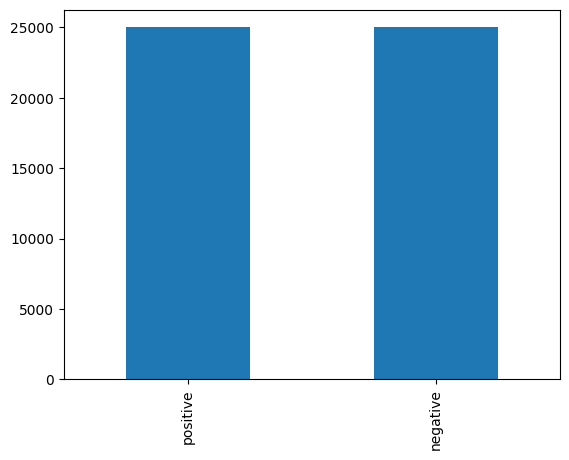

In [5]:
df['sentiment'].value_counts().plot(kind ='bar')

In [6]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['review'] = df['review'].map(lambda s:preprocess(s))

In [10]:
df['review']

0        one reviewers mentioned watching episode hooke...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

# **VECTORIZE THE TEXT**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [12]:
x = vect.fit_transform(df['review'])

In [13]:
x.shape

(50000, 101332)

In [14]:
type(x)

scipy.sparse._csr.csr_matrix

In [15]:
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# **SPLIT THE DATA INTO TRAIN AND TEST**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 101332)
(10000, 101332)
(40000,)
(10000,)


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [22]:
rf = RandomForestClassifier()

In [23]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose =2 , random_state=0)

In [24]:
search = clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time= 1.5min
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time= 1.5min
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time= 1.6min
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time= 1.5min
[CV] END criterion=entropy, max_depth=80, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time= 1.5min
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=  44.0s
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=  45.1s
[CV] END criterion=log_loss, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=

In [25]:
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 110,
 'criterion': 'gini'}

In [26]:
search.best_score_

0.8650249999999999

# **APPLICATION OF NB CLASSIFIER**

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb = MultinomialNB()

In [29]:
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train Accuracy score of the model is:  0.91
Test Accuracy score of the model is:  0.87


In [30]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [31]:
ada = AdaBoostClassifier()

In [32]:
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train Accuracy score of the model is:  0.91
Test Accuracy score of the model is:  0.87


In [33]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [35]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 1.0
[[20021     0]
 [    0 19979]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20021
           1       1.00      1.00      1.00     19979

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

The Accuracy of the model is: 0.85
[[4228  751]
 [ 732 4289]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4979
           1       0.85      0.85      0.85      5021

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# **DEPLOYMENT USING GRADIO**

In [41]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579

In [42]:
import gradio as gr

In [43]:
def transform(input_text):
  transformed_input=preprocess(input_text)
  vectorized=vect.transform([transformed_input])
  result=rf.predict_proba(vectorized)[0]
  return {"positive" :float(result[0]),"negative" : float(result[1])}

demo = gr.Interface(
    fn =transform,
    inputs =gr.Textbox(),
    outputs='label',
)
demo.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6a44ad629209760c23.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
